<a href="https://colab.research.google.com/github/sathizz7/Titanic-Dataset/blob/main/Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Titanic

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('train.csv')

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
cols = data.columns
cols

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
for col in cols:
  print(col , data[col].nunique())

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Ticket 681
Fare 248
Cabin 147
Embarked 3


In [ ]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
X = data.drop('Survived', axis =1)
y = data['Survived']

In [ ]:
X.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest , ytrain, ytest = train_test_split(X,y , test_size = 0.2 , random_state = 1)

In [ ]:
Xtrain.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            144
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         2
dtype: int64

In [ ]:
Xtrain.Age = Xtrain.Age.fillna(Xtrain.Age.median())

In [ ]:
Xtrain.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         2
dtype: int64

In [ ]:
Xtest.Age = Xtest.Age.fillna(Xtest.Age.median())

In [ ]:
Xtest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          140
Embarked         0
dtype: int64

In [ ]:
Xtrain.Embarked = Xtrain.Embarked.replace(np.nan , 'C')

In [ ]:
Xtrain.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          547
Embarked         0
dtype: int64

In [ ]:
Xtest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          140
Embarked         0
dtype: int64

In [ ]:
#cabin has many missing values, so we can drop it
Xtrain.shape

(712, 11)

In [ ]:
drop_colm = ['Name' , 'PassengerId', 'Ticket', 'Cabin']

In [ ]:
Xtrain = Xtrain.drop(drop_colm, axis = 1)

In [ ]:
Xtrain.shape

(712, 7)

In [ ]:
Xtrain.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [ ]:
Xtest = Xtest.drop(drop_colm, axis = 1)

In [ ]:
Xtest.shape

(179, 7)

In [ ]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 301 to 37
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    object 
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 44.5+ KB


In [ ]:
Xtrain.dtypes

Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
OHE = OneHotEncoder(sparse = False)

OHE_colm = OHE.fit_transform(Xtrain[['Sex', 'Embarked']])

In [ ]:
OHE_colm #.toarray()

array([[0., 1., 0., 1., 0.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.]])

In [ ]:
OHE_colm.shape

(712, 5)

In [ ]:
OHE_colm = pd.DataFrame(OHE_colm, columns = ['s1', 's2','e1','e2','e3'])

In [ ]:
OHE_colm

,s1,s2,e1,e2,e3
0,0.0,1.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0
4,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...
707,0.0,1.0,0.0,0.0,1.0
708,1.0,0.0,0.0,1.0,0.0
709,0.0,1.0,0.0,0.0,1.0
710,1.0,0.0,0.0,0.0,1.0


In [ ]:
Xtrain.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [ ]:
Xtrain[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]

,Pclass,Sex,Age,SibSp,Parch,Fare
301,3,male,29.0,2,0,23.2500
309,1,female,30.0,0,0,56.9292
516,2,female,34.0,0,0,10.5000
120,2,male,21.0,2,0,73.5000
570,2,male,62.0,0,0,10.5000
...,...,...,...,...,...,...
715,3,male,19.0,0,0,7.6500
767,3,female,30.5,0,0,7.7500
72,2,male,21.0,0,0,73.5000
235,3,female,29.0,0,0,7.5500


In [ ]:
#pd.concat([.. , ..])

In [ ]:
Xtrain.reset_index(drop = True, inplace = True)
OHE_colm.reset_index(drop = True , inplace = True)

In [ ]:
Xtrain = pd.concat([Xtrain[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']],OHE_colm], ax is = 1)

In [ ]:
Xtrain.head() 

,Pclass,Age,SibSp,Parch,Fare,s1,s2,e1,e2,e3
0,3,29.0,2,0,23.2500,0.0,1.0,0.0,1.0,0.0
1,1,30.0,0,0,56.9292,1.0,0.0,1.0,0.0,0.0
2,2,34.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,2,21.0,2,0,73.5000,0.0,1.0,0.0,0.0,1.0
4,2,62.0,0,0,10.5000,0.0,1.0,0.0,0.0,1.0


In [ ]:
OHE_colm_test = OHE.transform(Xtest[['Sex', 'Embarked']])

In [ ]:
OHE_colm_test = pd.DataFrame(OHE_colm_test, columns = ['s1', 's2','e1','e2','e3'])
OHE_colm_test

,s1,s2,e1,e2,e3
0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
174,1.0,0.0,0.0,0.0,1.0
175,0.0,1.0,0.0,0.0,1.0
176,0.0,1.0,0.0,1.0,0.0
177,0.0,1.0,0.0,1.0,0.0


In [ ]:
#reset_index
Xtest.reset_index(drop = True, inplace = True)
OHE_colm_test.reset_index(drop = True , inplace = True)

In [ ]:
Xtest = pd.concat([Xtest[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']],OHE_colm_test], axis = 1)

In [ ]:
Xtest

,Pclass,Age,SibSp,Parch,Fare,s1,s2,e1,e2,e3
0,1,48.0,0,0,25.9292,1.0,0.0,0.0,0.0,1.0
1,3,27.0,0,0,7.8958,0.0,1.0,0.0,0.0,1.0
2,2,17.0,0,0,10.5000,1.0,0.0,0.0,0.0,1.0
3,3,27.0,0,0,8.1375,1.0,0.0,0.0,1.0,0.0
4,2,7.0,0,2,26.2500,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
174,1,49.0,0,0,25.9292,1.0,0.0,0.0,0.0,1.0
175,1,27.0,0,0,0.0000,0.0,1.0,0.0,0.0,1.0
176,3,27.0,0,0,7.7333,0.0,1.0,0.0,1.0,0.0
177,3,21.0,0,0,7.7333,0.0,1.0,0.0,1.0,0.0


In [ ]:
Xtest.shape

(179, 10)

In [ ]:
import seaborn as sns

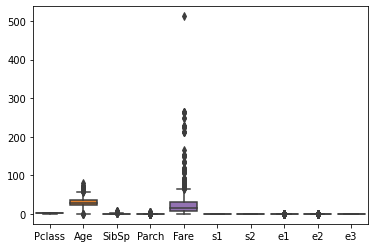

In [ ]:
sns.boxplot(data = Xtrain) #ages

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
SC = StandardScaler()

In [ ]:
Xtrain = SC.fit_transform(Xtrain)

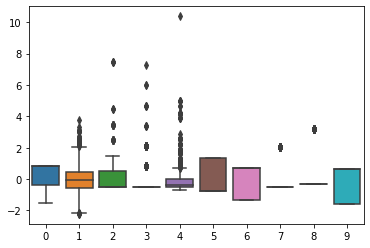

In [ ]:
sns.boxplot(data = Xtrain)

In [ ]:
Xtest = SC.transform(Xtest)

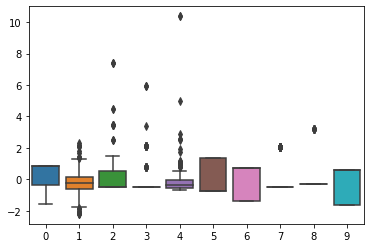

In [ ]:
sns.boxplot(data = Xtest)

#Modeling

In [ ]:
from sklearn.linear_model import LogisticRegression , SGDClassifier

In [ ]:
from sklearn.svm import SVC

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
from sklearn.metrics import f1_score, plot_confusion_matrix

In [ ]:
lr = LogisticRegression()
sgd = SGDClassifier()
svc = SVC()
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
gbc = GradientBoostingClassifier()

In [ ]:
lr.fit(Xtrain, ytrain)
sgd.fit(Xtrain, ytrain)
svc.fit(Xtrain, ytrain)
knn.fit(Xtrain, ytrain)
dtc.fit(Xtrain, ytrain)
rfc.fit(Xtrain, ytrain)
gbc.fit(Xtrain, ytrain)

GradientBoostingClassifier()

In [ ]:
s1 = lr.score(Xtest, ytest)
s2 = sgd.score(Xtest, ytest)
s3 = svc.score(Xtest, ytest)
s4 = knn.score(Xtest, ytest)
s5 = dtc.score(Xtest, ytest)
s6 = rfc.score(Xtest, ytest)
s7 = gbc.score(Xtest, ytest)

In [ ]:
scores = [s1,s2,s3,s4,s5,s6,s7]

In [ ]:
scores

[0.7988826815642458,
 0.7318435754189944,
 0.776536312849162,
 0.7653631284916201,
 0.770949720670391,
 0.776536312849162,
 0.7877094972067039]

In [ ]:
yp1 = lr.predict(Xtest)
yp2 = sgd.predict(Xtest)
yp3 = svc.predict(Xtest)
yp4 = knn.predict(Xtest)
yp5 = dtc.predict(Xtest)
yp6 = rfc.predict(Xtest)
yp7 = gbc.predict(Xtest)

In [ ]:
fs1 = f1_score(ytest, yp1)
fs2 = f1_score(ytest, yp2)
fs3 = f1_score(ytest, yp3)
fs4 = f1_score(ytest, yp4)
fs5 = f1_score(ytest, yp5)
fs6 = f1_score(ytest, yp6)
fs7 = f1_score(ytest, yp7)

In [ ]:
f_scores = [fs1, fs2,fs3,fs4,fs5,fs6,fs7]

In [ ]:
f_scores #plot f1 score ,compute,

[0.75,
 0.657142857142857,
 0.6610169491525425,
 0.6666666666666667,
 0.7092198581560283,
 0.6875,
 0.6833333333333333]

In [ ]:
scores

[0.7988826815642458,
 0.7318435754189944,
 0.776536312849162,
 0.7653631284916201,
 0.770949720670391,
 0.776536312849162,
 0.7877094972067039]

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
#tuning

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,1,10,100,1000], 'solver': ['newton-cg','lbfgs','liblinear','sag','saga']}

In [ ]:
GSCV = GridSearchCV(LogisticRegression(), param_grid = param_grid)

In [ ]:
GSCV.fit(Xtrain, ytrain)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [ ]:
GSCV.best_params_

{'C': 1, 'solver': 'newton-cg'}

In [ ]:
GSCV.best_score_

0.8020092583472864

In [ ]:
# GSCV gave best result 0.8